### Demo for reading peaks and high-water marks  

These data will be useful to plot for comparison with max. water levels from model output.  

Fields in the .csv files are described here: https://my.usgs.gov/confluence/display/WSN/STN+Data+Dictionary+-+Top+Level
(but this will stop working on Jan 27, 2023, and a Sharepoint site will replace it)

This notebook demonstrates reading the `.csv` files, picking out useful data, saveing those as smaller `.csv` files, plotting the data, and finding the data closest to a target lat/lon.

csherwood@usgs.gov

In [1]:
import pandas as pd
import numpy as np

# These files were downloaded from https://stn.wim.usgs.gov/fev/#2022Ian on 1/17/2023
hwm_file = r'/vortexfs1/home/csherwood/proj/NOPP/data/FilteredHWMs.csv'
peaks_file = r'/vortexfs1/home/csherwood/proj/NOPP/data/FilteredPeaks.csv'
inst_file = r'/vortexfs1/home/csherwood/proj/NOPP/data/FilteredInstrument.csv'

### Load the peaks data.
Examination reveals:  
* No time or stage estimates were made
* vdatum = NAVD88 except for one point, which we drop
* height_above_gnd is all NaNs
* all times are UTC

In [2]:
df = pd.read_csv(peaks_file)
#drop the record with local coordinates
df = df.drop(labels=3, axis=0)
# make a copy of the dataframe with the stuff we want in it.
df_peaks = df[['latitude_dd','longitude_dd','peak_date']].copy()
df_peaks['peak_stage_m'] = df['peak_stage'].values*0.3048
df_peaks.describe()

,latitude_dd,longitude_dd,peak_stage_m
count,56.000000,56.000000,56.000000
mean,28.645425,-80.896103,1.812798
std,3.600170,1.829941,0.931228
min,24.546980,-82.274410,0.213360
25%,26.343383,-81.812393,1.116330
50%,27.580440,-81.415569,1.836420
75%,29.786145,-80.954840,2.257806
max,38.790987,-75.140150,4.032504


### Read the high-water mark file
Examination reveals:  
    * All vdatum are NAVD88

Values for `hwm_type_id`
```
HWM type code.  Current possibilities:
1 Mud
2 Debris
3 Clear water
4 Vegetation line
5 Seed line
6 Stain line
7 Melted snow line
8 Present at peak (direct observation)
9 Other (Note in Description box)
```
Values for `hwm_quality_id`
```
HWM quality code.  Current possibilities:
1 Excellent: +/- 0.05 ft
2 Good: +/- 0.10 ft
3 Fair: +/- 0.20 ft
4 Poor: +/- 0.40 ft
5 VP: > 0.40 ft
6 Unknown/Historical
```
`stillwater` is boolean
    


In [3]:
df1 = pd.read_csv(hwm_file)
df1

,latitude,longitude,eventName,hwmTypeName,hwmQualityName,verticalDatumName,verticalMethodName,approvalMember,markerName,horizontalMethodName,...,event,peak_summary,survey_member,marker,approval,files,site,vertical_datums,flag_member,Links
0,27.265787,-82.551233,2022 Ian,Debris,Poor: +/- 0.40 ft,NAVD88,Level Gun,NaN,NaN,Map (digital or paper),...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
1,27.113984,-82.465796,2022 Ian,Debris,Poor: +/- 0.40 ft,NAVD88,Level Gun,Kevin Grimsley,Not marked,Map (digital or paper),...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
2,29.286538,-81.054583,2022 Ian,Debris,Good: +/- 0.10 ft,NAVD88,Level Gun,Patrick Ryan,NaN,Map (digital or paper),...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
3,29.286667,-81.054639,2022 Ian,Seed line,Excellent: +/- 0.05 ft,NAVD88,Level Gun,Patrick Ryan,NaN,Map (digital or paper),...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
4,28.623731,-80.795234,2022 Ian,Seed line,Fair: +/- 0.20 ft,NAVD88,Level Gun,Kevin Grimsley,NaN,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,28.545330,-81.371224,2022 Ian,Seed line,Fair: +/- 0.20 ft,NAVD88,RT-GNSS,John Storm,Marker,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
360,28.534942,-81.336802,2022 Ian,Debris,Poor: +/- 0.40 ft,NAVD88,RT-GNSS,John Storm,NaN,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
361,28.534942,-81.336802,2022 Ian,Debris,Poor: +/- 0.40 ft,NAVD88,RT-GNSS,John Storm,NaN,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
362,26.667526,-81.879386,2022 Ian,Seed line,Good: +/- 0.10 ft,NAVD88,RT-GNSS,Missing Approval,NaN,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN


### Pull a subset of data from the dataframe. 
All of the data for H. Ian are in NAVD88, so not testing for that.

In [4]:
# Pull data we want into a dataset, rename as 'df_hwm'
df_hwm = df1[['latitude_dd','longitude_dd','hwm_type_id','hwm_quality_id','stillwater']].copy()

# add some columns with data converted to meters
df_hwm['elev_m'] = df1['elev_ft'].values * 0.3048
df_hwm['uncertainty_m'] = df1['uncertainty'].values * 0.3048
df_hwm['height_above_gnd_m'] = df1['height_above_gnd'].values * 0.3048

# you could save this as a .csv file using:
df_hwm.to_csv('hwm_data.csv', index=False, float_format = '%.6f')

# get the statistics for each column
# note: not all of the columns have data...some are missing uncertainty and/or height_above_ground
df_hwm.describe()

,latitude_dd,longitude_dd,hwm_type_id,hwm_quality_id,stillwater,elev_m,uncertainty_m,height_above_gnd_m
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,296.000000,343.000000
mean,27.111323,-81.735916,4.587912,1.967033,0.131868,4.541453,0.039560,0.935478
std,1.583946,0.728046,1.108677,0.958656,0.338813,6.115265,0.133485,0.772790
min,24.546980,-82.551233,1.000000,1.000000,0.000000,0.228600,0.000305,0.000000
25%,26.438324,-82.023910,5.000000,1.000000,0.000000,2.103120,0.015240,0.289560
50%,26.546202,-81.859483,5.000000,2.000000,0.000000,2.636520,0.025603,0.758952
75%,26.716158,-81.731027,5.000000,2.000000,0.000000,3.535680,0.052426,1.450848
max,38.790490,-75.140640,9.000000,5.000000,1.000000,30.845760,2.286000,3.797808


<AxesSubplot: xlabel='longitude_dd', ylabel='latitude_dd'>

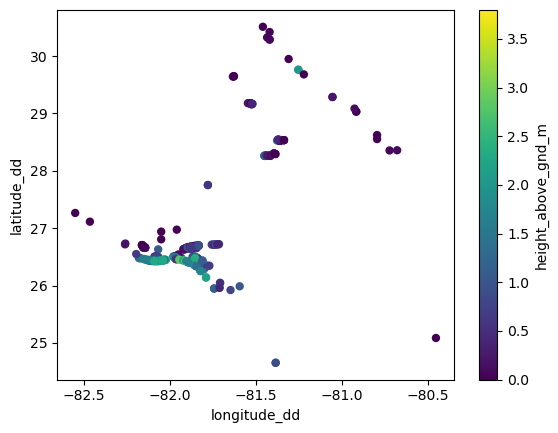

In [5]:
# For fun, make a map of the height above ground of the high-water marks
df_hwm.plot.scatter(x='longitude_dd', y='latitude_dd', s = 25, c = 'height_above_gnd_m' )

In [6]:
### Demonstrate finding result closest to a target lat/long

In [9]:
# Calc. distances from target with Haversine formula
# Modified after https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

# Provide target lat/lon...the formula requires radians
tlat = np.deg2rad( 27.8 )
tlon = np.deg2rad( -81.7 )
df_hwm[["lat_rad", "lon_rad"]] = np.deg2rad(df_hwm[['latitude_dd', 'longitude_dd']])
dlon = df_hwm['lon_rad'].values - tlon
dlat = df_hwm['lat_rad'].values - tlat

a = np.sin(dlat/2.0)**2 + np.cos(tlat) * np.cos(df_hwm['lat_rad'].values) * np.sin(dlon/2.0)**2
# multiply by radius of earth to get result in km
dist = 6367.* 2. * np.arcsin(np.sqrt(a))

In [10]:
# index of closest one
imin = np.argmin( dist )

In [11]:
print(dist[imin])

9.423338377104734


In [12]:
print(df_hwm.iloc[imin])

latitude_dd           27.752537
longitude_dd         -81.779424
hwm_type_id            5.000000
hwm_quality_id         2.000000
stillwater             1.000000
elev_m                24.414480
uncertainty_m          0.167640
height_above_gnd_m     0.335280
lat_rad                0.484373
lon_rad               -1.427320
Name: 340, dtype: float64
